In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import os
def show_montage(X, n, m, h, w):
    fig, axes = plt.subplots(h, w, figsize=(w, h))
    if X.shape[1] < w * h: # 影像張數不到 w x h 張，用 0 向量補齊
        X = np.c_[X, np.zeros((X.shape[0], w*h - X.shape[1]))]
    for i, ax in enumerate(axes.flat):
        ax.imshow(X[:,i].reshape(m, n).T, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

In [3]:
import numpy as np
from numpy.linalg import svd
import scipy.io
import matplotlib.pyplot as plt
import os

# 人臉資料
D = scipy.io.loadmat("/Users/andrewhsu/Library/Mobile Documents/com~apple~CloudDocs/VsCode_python/mat/allFaces.mat")
X = D['faces'] #32256*2410 each column represents an image 
y = np.ndarray.flatten(D['nfaces'])#分別代表每個人的張數
m = int(D['m'])#168
n = int(D['n'])#192
n_persons = int(D['person'])

# SVD
avgFace = X.mean(axis = 1).reshape(-1, 1)
X_avg = X - np.tile(avgFace,(1, X.shape[1]))
U,E,VT = svd(X_avg,full_matrices = False)


/var/folders/q1/b0ndsqyd5hldwkvkh_hw1d180000gn/T/ipykernel_18428/3658733541.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = int(D['m'])#168
/var/folders/q1/b0ndsqyd5hldwkvkh_hw1d180000gn/T/ipykernel_18428/3658733541.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n = int(D['n'])#192
/var/folders/q1/b0ndsqyd5hldwkvkh_hw1d180000gn/T/ipykernel_18428/3658733541.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n_persons = int(D['person'])


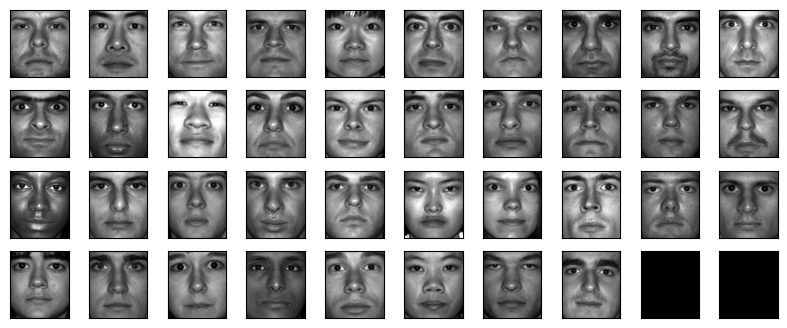

In [4]:
all_diff_persons = np.zeros((m*n, n_persons)) 
cnt = 0
for i in range(n_persons):
   all_diff_persons[:,i] = X[:,cnt] 
   cnt = cnt + y[i]
show_montage(all_diff_persons, n, m, 4,10)